# EMSC Web Services

This tutorial aims to present the use of EMSC services with concrete examples. The main access point for all services is http://www.seismicportal.eu/webservices.html.


 * How to search and find events (*fdsn-event*)
 * Get a Flinn Engdhal region name (*Flinn Engdhal*)
 * For a given event, look at the EMSC, USGS and INGV websites (*EventID*)
 * Collect Moment Tensors (*Moment Tensor*)
 * Collect Felt reports (*testimonies*)

 * Near real time information

The idea is to access Web services via an url, instead of a "web page" displayed in a browser, and get raw data. The principle is to build an url with some parameters that define the data we want to retrieve.
Parameters depends on the web service specification - for example the FDSN specification etc.

Use of web services
 * on the web, useful to separate data access and data display
 * automatic access via script (e.g. python, shell)






# A. Let's start with Web Services 101

From an user perspective, a web service is just an url!
> http://www.seismicportal.eu/fdsnws/event/1/query?limit=10&start=2017-09-01&format=text&minmag=6.5

It's composed of the 
 * protocal : http
 * hostname : www.seismicportal.eu
 * path : /fdsnws/event/1/query
 * query : *?limit=10&start=2017-09-01&format=text&minmag=6.5* with different attributs _limit_, *start*, *format* and *minmag* and their values.
 
From a practical point of view, we just have to 
 1. Build the url
 2. Download the result
 3. Parse the output

### 1. First use in python

In [1]:
import csv, requests
from StringIO import StringIO
def geturl(url):
    res = requests.get(url, timeout=15)
    return {'status': res.status_code,
            'content': res.text}

def parsecsv(txt, usedict=False):
    if usedict:
        parser = csv.DictReader(StringIO(txt), delimiter='|')
    else:
        parser = csv.reader(StringIO(txt), delimiter='|')
        header = parser.next()
    return [ line for line in parser]

#Build the url
url = "http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&format=text&minmag={minmag}".format(minmag=6.5)

#Download the result
res = geturl(url)
print res['content']

#Parse the result
for row in parsecsv(res['content']):
    print row

#EventID | Time | Latitude | Longitude | Depth/km | Author | Catalog | Contributor | ContributorID | MagType | Magnitude | MagAuthor | EventLocationName
20171010_0000169|2017-10-10T18:53:33.6Z|-54.33|8.49|10.0|EMSC|EMSC-RTS|EMSC|623367|mw|6.7|EMSC|BOUVET ISLAND REGION
20171008_0000103|2017-10-08T22:34:33.5Z|52.37|176.83|121.0|EMSC|EMSC-RTS|EMSC|622928|mw|6.6|EMSC|RAT ISLANDS, ALEUTIAN ISLANDS
20170919_0000091|2017-09-19T18:14:38.5Z|18.59|-98.47|50.0|EMSC|EMSC-RTS|EMSC|619258|mw|7.1|EMSC|PUEBLA, MEXICO
20170908_0000020|2017-09-08T04:49:21.2Z|15.02|-93.81|72.0|EMSC|EMSC-RTS|EMSC|616600|mw|8.1|EMSC|OFFSHORE CHIAPAS, MEXICO

['20171010_0000169', '2017-10-10T18:53:33.6Z', '-54.33', '8.49', '10.0', 'EMSC', 'EMSC-RTS', 'EMSC', '623367', 'mw', '6.7', 'EMSC', 'BOUVET ISLAND REGION']
['20171008_0000103', '2017-10-08T22:34:33.5Z', '52.37', '176.83', '121.0', 'EMSC', 'EMSC-RTS', 'EMSC', '622928', 'mw', '6.6', 'EMSC', 'RAT ISLANDS, ALEUTIAN ISLANDS']
['20170919_0000091', '2017-09-19T18:14:38.5Z', '

 ### 2. First use in shell
 

In [2]:
%%bash
echo "*** Url building"
MINMAG=6.5
url="http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&format=text&minmag=$MINMAG"
echo "url=${url}"

echo
echo "*** Web service output ***"
wget -O res.txt ${url}
cat res.txt

echo
echo "*** Parsing ***"
awk -F'|' '!/^#/ {printf "unid:%s, Origin Time:%s, Magnitude:%s, Region:%s\n", $1, $2, $11, $13}' res.txt


*** Url building
url=http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&format=text&minmag=6.5

*** Web service output ***
#EventID | Time | Latitude | Longitude | Depth/km | Author | Catalog | Contributor | ContributorID | MagType | Magnitude | MagAuthor | EventLocationName
20171010_0000169|2017-10-10T18:53:33.6Z|-54.33|8.49|10.0|EMSC|EMSC-RTS|EMSC|623367|mw|6.7|EMSC|BOUVET ISLAND REGION
20171008_0000103|2017-10-08T22:34:33.5Z|52.37|176.83|121.0|EMSC|EMSC-RTS|EMSC|622928|mw|6.6|EMSC|RAT ISLANDS, ALEUTIAN ISLANDS
20170919_0000091|2017-09-19T18:14:38.5Z|18.59|-98.47|50.0|EMSC|EMSC-RTS|EMSC|619258|mw|7.1|EMSC|PUEBLA, MEXICO
20170908_0000020|2017-09-08T04:49:21.2Z|15.02|-93.81|72.0|EMSC|EMSC-RTS|EMSC|616600|mw|8.1|EMSC|OFFSHORE CHIAPAS, MEXICO

*** Parsing ***
unid:20171010_0000169, Origin Time:2017-10-10T18:53:33.6Z, Magnitude:6.7, Region:BOUVET ISLAND REGION
unid:20171008_0000103, Origin Time:2017-10-08T22:34:33.5Z, Magnitude:6.6, Region:RAT ISLANDS, ALEUTIAN ISLANDS
unid

--2017-10-20 12:04:47--  http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&format=text&minmag=6.5
Resolving www.seismicportal.eu (www.seismicportal.eu)... 193.52.21.115
Connecting to www.seismicportal.eu (www.seismicportal.eu)|193.52.21.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628 [text/plain]
Saving to: ‘res.txt’

     0K                                                       100% 80.3M=0s

2017-10-20 12:04:47 (80.3 MB/s) - ‘res.txt’ saved [628/628]



### 3. Look at web service specifications

It's important to know the parameters to customize the request for your use.
For instance, the choice of the output format is important. Because it may be more or less easy to parse the results and because it depends on the information that you need.

At the moment we have chosen

> &format=text

**text** is a good choice for shell use or for human eyes.

However, for fdsn-event web service, you also have the choice of 
**json** and **xml**.



#### Parsing json output

In [3]:
import json
def parsejson(txt):
    return json.loads(txt)

In [4]:
url = "http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&minmag=6.5&format=json"

Note the **&format=json** in the url. Now we get the content:

In [5]:
info = geturl(url)
print info['content'][:400]

{"type":"FeatureCollection","metadata":{"totalCount":4},"features":[{
  "geometry": {
    "type": "Point", 
    "coordinates": [
      8.49, 
      -54.33, 
      -10.0
    ]
  }, 
  "type": "Feature", 
  "id": "20171010_0000169", 
  "properties": {
    "lastupdate": "2017-10-11T06:50:00.0Z", 
    "magtype": "mw", 
    "evtype": "ke", 
    "lon": 8.49, 
    "auth": "EMSC", 
    "lat": -54.33, 
   


And finally the parsing process:

In [6]:
data = parsejson( info['content'])

print "Type of the parsed data:", type(data)
print "List of keys:", data.keys()

Type of the parsed data: <type 'dict'>
List of keys: [u'type', u'features', u'metadata']


In this case, event information is in the 'features' attributes

In [7]:
for ev in data['features']:
    print "***Event:",ev['id']
    print ev['properties']

***Event: 20171010_0000169
{u'lastupdate': u'2017-10-11T06:50:00.0Z', u'magtype': u'mw', u'time': u'2017-10-10T18:53:33.6Z', u'lon': 8.49, u'auth': u'EMSC', u'source_id': u'623367', u'depth': 10.0, u'unid': u'20171010_0000169', u'mag': 6.7, u'evtype': u'ke', u'lat': -54.33, u'source_catalog': u'EMSC-RTS', u'flynn_region': u'BOUVET ISLAND REGION'}
***Event: 20171008_0000103
{u'lastupdate': u'2017-10-08T22:47:00.0Z', u'magtype': u'mw', u'time': u'2017-10-08T22:34:33.5Z', u'lon': 176.83, u'auth': u'EMSC', u'source_id': u'622928', u'depth': 121.0, u'unid': u'20171008_0000103', u'mag': 6.6, u'evtype': u'ke', u'lat': 52.37, u'source_catalog': u'EMSC-RTS', u'flynn_region': u'RAT ISLANDS, ALEUTIAN ISLANDS'}
***Event: 20170919_0000091
{u'lastupdate': u'2017-09-19T18:42:00.0Z', u'magtype': u'mw', u'time': u'2017-09-19T18:14:38.5Z', u'lon': -98.47, u'auth': u'EMSC', u'source_id': u'619258', u'depth': 50.0, u'unid': u'20170919_0000091', u'mag': 7.1, u'evtype': u'ke', u'lat': 18.59, u'source_catalo

#### Parsing Quakeml format

the easiest choice is to use the quakeml parser from Obspy.

In [8]:
from obspy import read_events

url = "http://www.seismicportal.eu/fdsnws/event/1/query?start=2017-09-01&minmag=6.5&format=xml"

data = read_events(url)
print data

4 Event(s) in Catalog:
2017-10-10T18:53:33.600000Z | -54.330,   +8.490 | 6.7 mw | manual
2017-10-08T22:34:33.500000Z | +52.370, +176.830 | 6.6 mw | manual
2017-09-19T18:14:38.500000Z | +18.590,  -98.470 | 7.1 mw | manual
2017-09-08T04:49:21.200000Z | +15.020,  -93.810 | 8.1 mw | manual


# B. Seismological use cases

1. Search for a seismic event
2. Get earthquake parameters
   * get origin parameters
   * add all origins and/or arrivals
3. Retrieve a Flinn Endghal region name
4. How to look for information from multiple institutes (EMSC, USGS, INGV)
5. Get moment tensor data
6. Get felt reports data (Testimonies)
  
   

## 1. Search for a seismic event
The part A. describes how to use a web service in python and in shell. The url choosen for this example is the one used to search an event between October 1st, 2017 and now with a magnitude greater than 6.

## 2. Get earthquake parameters

In the following, we consider the M7.1 Puebla, Mexico earthquake on September, 19th 2017. Suppose we know the following information.

| Earthquake
| --- | --- |
| Unid | **20170919_0000091** |
| Date time | 2017-09-19 18:14:38.5 UTC |
| Region | PUEBLA, MEXICO |


In [9]:
main_event = {'unid':'20170919_0000091'}

### To get the parameter origin
The easiest way to get the parameters of the main origin is to use the fdsn-event web service and to choose the **text** format.

In [10]:
url = "http://www.seismicportal.eu/fdsnws/event/1/query?eventid={unid}&format=text".format(unid=main_event['unid'])
res = geturl(url)
dataev = parsecsv(res['content'])
print dataev

[['20170919_0000091', '2017-09-19T18:14:38.5Z', '18.59', '-98.47', '50.0', 'EMSC', 'EMSC-RTS', 'EMSC', '619258', 'mw', '7.1', 'EMSC', 'PUEBLA, MEXICO']]


If you prefer to use **json**

In [11]:
url = "http://www.seismicportal.eu/fdsnws/event/1/query?eventid={unid}&format=json".format(unid=main_event['unid'])
res = geturl(url)
dataev = parsejson(res['content'])
eqinfo = dataev['properties']
print eqinfo

{u'lastupdate': u'2017-09-19T18:42:00.0Z', u'magtype': u'mw', u'time': u'2017-09-19T18:14:38.5Z', u'lon': -98.47, u'auth': u'EMSC', u'source_id': u'619258', u'depth': 50.0, u'unid': u'20170919_0000091', u'mag': 7.1, u'evtype': u'ke', u'lat': 18.59, u'source_catalog': u'EMSC-RTS', u'flynn_region': u'PUEBLA, MEXICO'}


Or **xml** (Quakeml)

In [12]:
url = "http://www.seismicportal.eu/fdsnws/event/1/query?eventid={unid}&format=xml".format(unid=main_event['unid'])
dataev = read_events(url)
print dataev

1 Event(s) in Catalog:
2017-09-19T18:14:38.500000Z | +18.590,  -98.470 | 7.1 mw | manual


### To get all origins and/or phases

The fdsn-event specifications define the parameter
 * **includeallorigins** to include also all origins
 * **includearrivals** to include arrivals
Note that in both case, these information are not included with the **text** format and it is a good choice to use the QuakeML format.


In [13]:
%%capture --no-stdout
#avoid warnings
print "\n*** With origins"
url = "http://www.seismicportal.eu/fdsnws/event/1/query?eventid={unid}&format=xml&includeallorigins=true".format(unid=main_event['unid'])
dataev = read_events(url)
print dataev
for ev in dataev:
    print ev

print "\n*** With origins and arrivals"
url = "http://www.seismicportal.eu/fdsnws/event/1/query?eventid={unid}&format=xml&includeallorigins=true&includearrivals=true".format(unid=main_event['unid'])
dataev = read_events(url)
print dataev
for ev in dataev:
    print ev


*** With origins
1 Event(s) in Catalog:
2017-09-19T18:14:38.500000Z | +18.590,  -98.470 | 7.1 mw | manual
Event:	2017-09-19T18:14:38.500000Z | +18.590,  -98.470 | 7.1 mw | manual

	            resource_id: ResourceIdentifier(id="quakeml:eu.emsc/event/20170919_0000091")
	          creation_info: CreationInfo(agency_uri=ResourceIdentifier(id="smi:smi-registry/organization/EMSC"), author_uri=ResourceIdentifier(id="smi:smi-registry/organization/EMSC"), creation_time=UTCDateTime(2017, 9, 19, 18, 43, 15, 714461))
	    preferred_origin_id: ResourceIdentifier(id="quakeml:eu.emsc/event/20170919_0000091/origin/FWDO5")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:eu.emsc/event/20170919_0000091/origin/FWDO5/mag/1")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 35 Elements
	             magnitudes: 35 Elements

*** With origins and arrivals
1 Event(s) in Catalog:
2017-09-19T18:14:38.500000Z | +18.590,  -98.470 | 7.1 mw | manual
Event:	2017

## 3. Retrieve a Flinn Endghal region name
This web service returns a region name from a geographical location (longitude and latitude).

In [14]:
url = "http://www.seismicportal.eu/fe_regions_ws/query?format=json&lat={lat}&lon={lon}"
res = geturl(url.format(**eqinfo))
print parsejson(res['content'])

{u'name_s': u'PUEBLA, MEXICO', u'name_h': u'NORTH AMERICA;MEXICO;PUEBLA', u'name_l': u'Puebla, Mexico', u'name_m': u'PUEBLA, MEXICO'}


## 4. How to manage information from multiple institutes (EMSC, USGS, INGV)
Many institutes associate to each event an identifier. And this identifier is an effective way to find the information of an event. It can be time consuming to get ID of different institutes. The **EventID** web service is intended to facilitate this task.

To illustrate this, we have the ID of the seismic portal of the M7.1 Mexican earthquake 
> unid : 20170919_0000091

And we would like to get the information from the websites of EMSC, USGS and INGV.

In [15]:
url = "http://vigogne.emsc-csem.org/eventid/api/convert?source_id={id}&source_catalog={source}&out_catalog={out}&format=text"
res = geturl(url.format(id=main_event['unid'], source='UNID', out='all'))
iddata = parsecsv(res['content'], usedict=True)

In [16]:
for l in iddata:
    print "* Institute {#catalog:5}, ID: {eventid}\n   url: {url}".format(**l)

* Institute EMSC , ID: 619258
   url: http://www.seismicportal.eu/fdsnws/event/1/query?catalog=EMSC-RTS&source_id=619258&format=text
* Institute ISC  , ID: 610994335
   url: http://isc-mirror.iris.washington.edu/fdsnws/event/1/query?eventid=610994335
* Institute USGS , ID: us2000ar20
   url: https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000ar20&format=csv
* Institute INGV , ID: 17111031
   url: http://webservices.ingv.it/fdsnws/event/1/query?format=text&eventId=17111031


Now we can check event information from 
 * USGS https://earthquake.usgs.gov/earthquakes/eventpage/us2000ar20
 * EMSC https://www.emsc-csem.org/Earthquake/earthquake.php?id=619258
 * INGV http://cnt.rm.ingv.it/event/17111031

## 5. Get moment tensor data
First we try to find moment tensors data for one event (here the M7.1 seismic event in Mexico)

In [17]:
url = "http://vigogne.emsc-csem.org/mtws/api/search?format=text&eventid={unid}"
res = geturl(url.format(unid=main_event['unid']))
print res['content'][:1000]

#ev_unid|ev_region|ev_event_time|ev_latitude|ev_longitude|ev_mag_type|ev_mag_value|ev_depth|mt_source_catalog|mt_region|mt_centroid_time|mt_latitude|mt_longitude|mt_mw|mt_depth|mt_strike_1|mt_dip_1|mt_rake_1|mt_strike_2|mt_dip_2|mt_rake_2|mt_tval|mt_tplung|mt_taz|mt_pval|mt_pplung|mt_paz|mt_nval|mt_nplung|mt_naz|mt_mrr|mt_mtt|mt_mpp|mt_mrt|mt_mrp|mt_mtp|mt_per_dc|mt_per_clvd|mt_per_iso|mt_m0
20170919_0000091|PUEBLA, MEXICO|2017-09-19 18:14:38.5 UTC|18.59|-98.47|mw|7.1|50|GCMT|PUEBLA, MEXICO|2017-09-19 18:14:47.1 UTC|18.51|-98.62|7.1|53|108|44|-98|300|47|-82|6.276e19|1|23|-6.506e19|84|281|0.231e19|5|114|-6.43e19|5.28e19|1.15e19|-0.006e19|-0.742e19|-2.25e19|92.91|7.09|0|6.39e19
20170919_0000091|PUEBLA, MEXICO|2017-09-19 18:14:38.5 UTC|18.59|-98.47|mw|7.1|50|CPPT|PUEBLA, MEXICO|2017-09-19 18:14:40 UTC|18.42|-98.57|7|15|324|50|-42|83|59|-132|4.02e19|5|201|-4.019e19|54|299|0e19|35|108|-2.618e19|3.111e19|-0.493e19|-1.254e19|-1.533e19|-1.961e19|99.98|0.02|0|4.02e19
20170919_0000091|PUEBLA, ME

In [18]:
mt_data = parsecsv(res['content'], usedict=True)
for mt in mt_data:
    print "Mt from {mt_source_catalog:10}, Strike: {mt_strike_1}, Dip: {mt_dip_1}, Rake: {mt_rake_1}".format(**mt)

Mt from GCMT      , Strike: 108, Dip: 44, Rake: -98
Mt from CPPT      , Strike: 324, Dip: 50, Rake: -42
Mt from USGS      , Strike: 111, Dip: 46, Rake: -94
Mt from IPGP      , Strike: 111, Dip: 37, Rake: -91
Mt from GFZ       , Strike: 104, Dip: 49, Rake: -98


And we get all moment tensor solutions received by the EMSC.

Let's play with obspy to plot the USGS solution. To select directly this moment tensor, we can add the constraint **source_catalog=USGS** to this url.

USGS solution


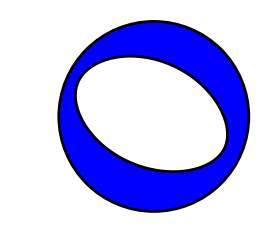

In [19]:
from obspy.imaging.beachball import beachball
url= "http://vigogne.emsc-csem.org/mtws/api/search?source_catalog=USGS&eventid=20170919_0000091&format=text"
mt = parsecsv(geturl(url)['content'], usedict=True)[0] #we get a list with only one element.
t = map(float, [mt['mt_mrr'], mt['mt_mtt'], mt['mt_mpp'], mt['mt_mrt'], mt['mt_mrp'], mt['mt_mtp']])
print "USGS solution"
beachball(t, width=200);


### Case of multiple events
Let's see the case where we want to collect all MT for the last month that have a magnitude greater than 6. The URL corresponding to this search is:
> http://vigogne.emsc-csem.org/mtws/api/search?starttime=2017-10-01&endtime=2017-10-19&minmag=6&format=text



In [20]:
url = 'http://vigogne.emsc-csem.org/mtws/api/search\
?starttime=2017-10-01&endtime=2017-10-19&minmag=6&format=text'
res = geturl(url)
mt_data = parsecsv(res['content'], usedict=True)

#how many distinct events?
allid = set([ mt['#ev_unid'] for mt in mt_data])
print "Data contains {0} events for {1} Mt\n".format(len(allid), len(mt_data))

for mt in mt_data:
    print "{mt_source_catalog:6}, Unid: {#ev_unid}, Strike: {mt_strike_1}, Dip: {mt_dip_1}, Rake: {mt_rake_1}".format(**mt)

Data contains 6 events for 30 Mt

GCMT  , Unid: 20171018_0000044, Strike: 214, Dip: 21, Rake: 97
CPPT  , Unid: 20171018_0000044, Strike: 237, Dip: 16, Rake: 121
GFZ   , Unid: 20171018_0000044, Strike: 223, Dip: 14, Rake: 104
IPGP  , Unid: 20171018_0000044, Strike: 232, Dip: 19, Rake: 115
USGS  , Unid: 20171018_0000044, Strike: 201, Dip: 26, Rake: 78
GCMT  , Unid: 20171010_0000169, Strike: 218, Dip: 85, Rake: -180
GFZ   , Unid: 20171010_0000169, Strike: 309, Dip: 88, Rake: 5
CPPT  , Unid: 20171010_0000169, Strike: 310, Dip: 79, Rake: 4
USGS  , Unid: 20171010_0000169, Strike: 310, Dip: 84, Rake: -3
IPGP  , Unid: 20171010_0000169, Strike: 130, Dip: 90, Rake: 3
GCMT  , Unid: 20171008_0000103, Strike: 220, Dip: 39, Rake: 5
CPPT  , Unid: 20171008_0000103, Strike: 221, Dip: 49, Rake: 3
USGS  , Unid: 20171008_0000103, Strike: 217, Dip: 43, Rake: 4
GFZ   , Unid: 20171008_0000103, Strike: 124, Dip: 86, Rake: 129
IPGP  , Unid: 20171008_0000103, Strike: 222, Dip: 39, Rake: 2
GCMT  , Unid: 20171008

If you want to make a maps of moment tensors, it's often useful to select only one solution per event. To solve this issue, we have introduce the notion of preferred solution. The associated parameter is **preferredOnly**. If we add **preferredOnly=true** to the url we obtain the following result.

In [21]:
url = 'http://vigogne.emsc-csem.org/mtws/api/search\
?starttime=2017-10-01&endtime=2017-10-19&minmag=6&format=text&preferredOnly=true'
mt_data = parsecsv(geturl(url)['content'], usedict=True)
for mt in mt_data:
    print "{mt_source_catalog:6}, Unid: {#ev_unid}, Strike: {mt_strike_1}, Dip: {mt_dip_1}, Rake: {mt_rake_1}".format(**mt)

GCMT  , Unid: 20171018_0000044, Strike: 214, Dip: 21, Rake: 97
GCMT  , Unid: 20171010_0000169, Strike: 218, Dip: 85, Rake: -180
GCMT  , Unid: 20171008_0000103, Strike: 220, Dip: 39, Rake: 5
GCMT  , Unid: 20171008_0000093, Strike: 244, Dip: 79, Rake: -178
GCMT  , Unid: 20171008_0000067, Strike: 290, Dip: 88, Rake: 180
GCMT  , Unid: 20171006_0000040, Strike: 42, Dip: 43, Rake: -66


## 6. Get felt reports (Testimonies)

Through our website, mobile and our mobile app LastQuake, we encourage eyewitnesses to evaluate the felt intensity for significant earthquakes. All this dataset is available via our **Testimonies** web service.

The search parameters are simple and looks like other web services specifications. The main difference is with the output. You have the choice to get only event parameters with **format=text** and **format=json**.

In [22]:
url = "http://vigogne.emsc-csem.org/testimonies-ws/api/search?eventid={unid}&format=json"
tdata = parsejson(geturl(url.format(**main_event))['content'])
print tdata

[{u'ev_unid': u'20170919_0000091', u'ev_mag_value': 7.1, u'ev_event_time': u'2017-09-19 18:14:38.5 UTC', u'ev_mag_type': u'mw', u'ev_nbtestimonies': 737, u'ev_depth': 50, u'full_count': 1, u'ev_last_update': u'2017-10-18 14:21:59 UTC', u'ev_region': u'PUEBLA, MEXICO', u'ev_longitude': -98.47, u'ev_deltatime': u'@ 28 days 20 hours 7 mins 20.5 secs', u'ev_id': 5463, u'ev_latitude': 18.59}]


Here we don't have the values of the testimony intensities but we get the number of testimonies

In [23]:
print 'Nbr of testimonies:',tdata[0]['ev_nbtestimonies']

Nbr of testimonies: 737


### Access to all testimonies (in shell)
To access to all testimonies, the query is different and the url looks like:
> http://vigogne.emsc-csem.org/testimonies-ws/api/search?unids=[UNID1,UNID2,...]&includeTestimonies=true

Notice the contraint **includeTestimonies=true** and the **unids=[...]**. To avoid overhead, this web service return a zip file containing a text file for each requested events.

In [24]:
%%bash
UNID=20170919_0000091
wget -O "res.zip" "http://vigogne.emsc-csem.org/testimonies-ws/api/search?unids=[${UNID}]&includeTestimonies=true"
ls -l

total 108
-rw-rw-rw- 1 root root 16868 Jan  1  1980 20170919_0000091.txt
-rw-r--r-- 1 root root 72024 Oct 20 12:04 emsc_services.ipynb
-rw-rw-rw- 1 root root   628 Oct 20 12:04 res.txt
-rw-r--r-- 1 root root 10240 Oct 20 12:04 res.zip


--2017-10-20 12:04:55--  http://vigogne.emsc-csem.org/testimonies-ws/api/search?unids=[20170919_0000091]&includeTestimonies=true
Resolving vigogne.emsc-csem.org (vigogne.emsc-csem.org)... 193.52.21.79
Connecting to vigogne.emsc-csem.org (vigogne.emsc-csem.org)|193.52.21.79|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘res.zip’

     0K ..........                                             77.5M=0s

2017-10-20 12:04:55 (77.5 MB/s) - ‘res.zip’ saved [10240]



We get the zip file 'res.zip' and we can check the content of the archive and verify that we get the *20170919_0000091.txt* file.

In [25]:
%%bash
echo
echo "*** Unzip the Downloaded file ***"
unzip -u 'res.zip'
chmod a+rw *.txt #need to do that for some file in jupyter notebook


*** Unzip the Downloaded file ***
Archive:  res.zip


The format of text file inside the zip is a column based using a ',' as delimiter. It's easy to parse in python and in shell with *awk* for instance.

In [26]:
%%bash
UNID=20170919_0000091
head ${UNID}.txt

echo 
echo "Parsing with awk"
head ${UNID}.txt | awk -F',' '!/^#/ {printf "Longitude:%f, Latitude:%f, Raw I:%d, Corr I:%.1f\n", $1, $2, $3, $4}' 

#20170919_0000091
#thumbnails 1.0
#Correction from Bossu et al. 2016
#longitude,latitude,iraw,icorr
-96.133,19.1854,4,4.5
-99.1332,19.4319,6,7.1
-99.1332,19.4326,5,5.8
-98.8734,19.5066,6,7.1
-97.9228,19.3205,6,7.1
-99.1672,19.2702,6,7.1

Parsing with awk
Longitude:-96.133000, Latitude:19.185400, Raw I:4, Corr I:4.5
Longitude:-99.133200, Latitude:19.431900, Raw I:6, Corr I:7.1
Longitude:-99.133200, Latitude:19.432600, Raw I:5, Corr I:5.8
Longitude:-98.873400, Latitude:19.506600, Raw I:6, Corr I:7.1
Longitude:-97.922800, Latitude:19.320500, Raw I:6, Corr I:7.1
Longitude:-99.167200, Latitude:19.270200, Raw I:6, Corr I:7.1


### Python version
With python we can get the data in numpy array without writing file.

In [27]:
import zipfile
url = "http://vigogne.emsc-csem.org/testimonies-ws/api/search?unids=[{unid}]&includeTestimonies=true"
r = requests.get(url.format(**main_event), stream=True)
z = zipfile.ZipFile(StringIO(r.content))
print 'Requested event:' ,main_event
print 'Downloaded result:', z.namelist()

Requested event: {'unid': '20170919_0000091'}
Downloaded result: ['20170919_0000091.txt']


We can verify that the downloaded data contains only one file for our main event.

In [28]:
#Expected name
filename = "{unid}.txt".format(**main_event)
data = z.read(filename)

To parse the data, a simple numpy *loadtxt* does the job.

In [29]:
import numpy as np

A = np.loadtxt(StringIO(data), delimiter=',')
print A.shape
print A

(737, 4)
[[-96.133   19.1854   4.       4.5   ]
 [-99.1332  19.4319   6.       7.1   ]
 [-99.1332  19.4326   5.       5.8   ]
 ..., 
 [-99.1332  19.4326   7.       8.3   ]
 [-97.9234  19.3185   4.       4.5   ]
 [-99.1646  19.4319  10.      10.    ]]
